In [71]:
import string
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from gensim.models import Word2Vec

import nltk
nltk.download('punkt', download_dir='.')
nltk.download('stopwords', download_dir='.')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from livelossplot.tf_keras import PlotLossesCallback

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ....
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [73]:
df.shape

(74681, 4)

In [74]:
df.drop(df[df.iloc[:, -1].isnull()].index, inplace=True)

In [75]:
df.shape

(73995, 4)

In [76]:
def tokenize_text(text):
  tokenized_str = nltk.word_tokenize(text)
  stop_words = nltk.corpus.stopwords.words('english')
  tokens = [i.lower() for i in tokenized_str if i not in string.punctuation]
  tokens = [i.lower() for i in tokens if i not in stop_words]
  return tokens

In [77]:
tokensed_tweets = df.iloc[:, -1].apply(tokenize_text)
tokensed_tweets[:5]

0                  [coming, borders, kill]
1         [im, getting, borderlands, kill]
2        [im, coming, borderlands, murder]
3    [im, getting, borderlands, 2, murder]
4       [im, getting, borderlands, murder]
Name: im getting on borderlands and i will murder you all ,, dtype: object

In [63]:
df['tokensed_tweets'] = tokensed_tweets

In [64]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",tokensed_tweets,vect
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,"[coming, borders, kill]","[1, 293, 6432, 320]"
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]","[1, 206, 94, 69, 320]"
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[1, 206, 293, 69, 1599]"
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]","[1, 206, 94, 69, 10, 1599]"
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]","[1, 206, 94, 69, 1599]"


In [36]:
w2v = Word2Vec(df['tokensed_tweets'], vector_size=256, window=10, min_count=10, workers=4, sg=1)

In [37]:
w2v.wv.get_vector('android')

array([ 0.38369507, -0.1157565 , -0.17306708, -0.22671993, -0.04415914,
        0.4395917 , -0.05043685, -0.09256136,  0.19083755,  0.14152518,
       -0.16180374, -0.07047958,  0.06418104, -0.1574289 , -0.3921977 ,
        0.39534914, -0.19979782, -0.22270587,  0.01518263,  0.368144  ,
       -0.274407  , -0.3316497 , -0.15003541, -0.76313734, -0.08232411,
        0.03283606,  0.31114498,  0.36861625,  0.03338351, -0.03955861,
        0.3517768 , -0.0112905 ,  0.05466387, -0.34393415, -0.3557624 ,
       -0.12249655,  0.11886567, -0.45759258, -0.06025662,  0.08093195,
       -0.03882565,  0.0212869 , -0.21674177, -0.09624472, -0.00582539,
       -0.22276722,  0.0141505 , -0.21588062,  0.17282419, -0.27458158,
        0.00501057,  0.01004602,  0.08065832, -0.01685985,  0.22572012,
       -0.05692507, -0.16712938, -0.07323501, -0.00385505,  0.14918543,
       -0.21410525,  0.07572555, -0.05291244,  0.20495269,  0.3279994 ,
        0.21532027, -0.28017503,  0.14827643,  0.01221525, -0.32

In [38]:
w2v.wv.most_similar('android')

[('ios', 0.7698169946670532),
 ('api', 0.6740089654922485),
 ('itt', 0.6546459794044495),
 ('os', 0.5978164672851562),
 ('processor', 0.5971769094467163),
 ('lite', 0.5941829681396484),
 ('32gb', 0.5896753668785095),
 ('failure', 0.5870147943496704),
 ('redownloaded', 0.5806881189346313),
 ('pso2', 0.577908456325531)]

In [39]:
word_vocab = w2v.wv.key_to_index
len(word_vocab.keys())

7884

In [40]:
df.Positive.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Positive'] = encoder.fit_transform(df['Positive'])
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",tokensed_tweets
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"


In [42]:
df.Positive.unique()

array([3, 2, 1, 0])

In [43]:
word_vocab = {k:(v+3) for k,v in word_vocab.items()}
word_vocab["<PAD>"] = 0
word_vocab["<START>"] = 1
word_vocab["<UNKNOWN>"] = 2

reverse_word_vocab = dict([(value, key) for (key, value) in word_vocab.items()])

# index sequence to text
def decode_review(text):
    return ' '.join([reverse_word_vocab.get(i, '?') for i in text])

# text to index sequence
def encode_review(text):
    text = ['<START>'] + text
    idxs = np.array([word_vocab.get(word, word_vocab['<UNKNOWN>']) for word in text])
    return idxs


In [44]:
df['vect'] = df.tokensed_tweets.apply(encode_review)

print(df.tokensed_tweets[1])
print(df.vect[1])
print('Example of a decoded review: \n{}'.format(decode_review(df.vect[1])))

['im', 'getting', 'borderlands', 'kill']
[  1 206  94  69 320]
Example of a decoded review: 
<START> im getting borderlands kill


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.vect, df.Positive, test_size=0.2, random_state=40)

In [51]:
X_train[:5]

9952     [1, 217, 187, 55, 267, 1957, 4823, 1069, 63, 3...
5667     [1, 110, 298, 551, 945, 42, 247, 429, 722, 309...
38790                               [1, 39, 2, 1154, 1233]
32604    [1, 34, 380, 95, 197, 86, 345, 1564, 146, 4, 4...
29729    [1, 214, 2, 1665, 56, 103, 978, 2062, 3, 93, 6...
Name: vect, dtype: object

In [52]:
y_train[:5]

9952     2
5667     2
38790    1
32604    2
29729    1
Name: Positive, dtype: int32

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1))

In [54]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [55]:
from random import randint

MAX_SEQ_LEN = 128 # Final sequence length

train_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_train,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

valid_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_test,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

print("Length examples: {}".format([len(train_data[randint(1, 100)]), len(train_data[1])]))
print('=====================================')
print("Entry example: {}".format(train_data[randint(1, 100)]))

Length examples: [128, 128]
Entry example: [   1  111   80 1253   52   84   81    2   78  359  288   24  266 1558
  104   84   63  111  586  178 1469   98    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [56]:
BATCH_SIZE = 256

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(26960, 64),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.Dense(4, activation='softmax'),
])
model_lstm.summary()

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=[tf.keras.metrics.AUC()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1725440   
                                                                 
 bidirectional (Bidirection  (None, None, 64)          24832     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, None, 64)          256       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          24832     
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, None, 64)          256       
 chNormalization)                                       

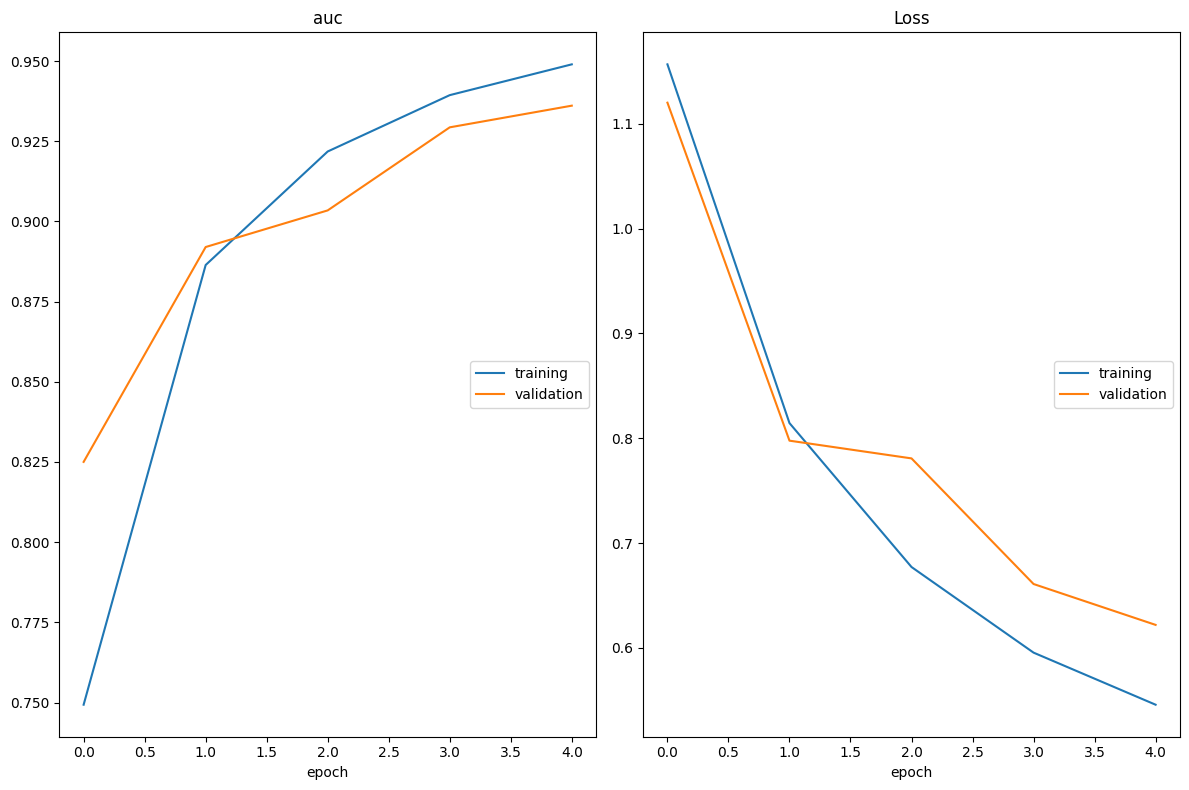

auc
	training         	 (min:    0.749, max:    0.949, cur:    0.949)
	validation       	 (min:    0.825, max:    0.936, cur:    0.936)
Loss
	training         	 (min:    0.546, max:    1.157, cur:    0.546)
	validation       	 (min:    0.622, max:    1.120, cur:    0.622)
232/232 [==============================] - 30394s 132s/step - loss: 0.5458 - auc: 0.9490 - val_loss: 0.6219 - val_auc: 0.9361


In [57]:
EPOCHS = 5
history = model_lstm.fit(
    train_data, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(valid_data, y_test),
    epochs=EPOCHS,
    callbacks=[PlotLossesCallback()])

In [58]:
model_lstm.predict(valid_data[0, None])

1/1 [==============================] - 3s 3s/step


array([[0.00275263, 0.96033204, 0.02790229, 0.0090131 ]], dtype=float32)

In [59]:
results = model_lstm.evaluate(valid_data, y_test)

print('Test loss: {:.4f}'.format(results[0]))
print('Test accuracy: {:.2f} %'.format(results[1]*100))

463/463 [==============================] - 35s 77ms/step - loss: 0.6219 - auc: 0.9361
Test loss: 0.6219
Test accuracy: 93.61 %
